# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

previsao_renda_raw = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
previsao_renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [51]:
previsao_renda = previsao_renda_raw[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
previsao_renda['qtd_filhos_pct'] = previsao_renda['qtd_filhos'] / (previsao_renda_raw['qtd_filhos'].sum() - previsao_renda['qtd_filhos'])
previsao_renda['idade_pct'] = previsao_renda['idade'] / (previsao_renda_raw['idade'].sum() - previsao_renda['idade'])
previsao_renda['tempo_emprego_pct'] = previsao_renda['tempo_emprego'] / (previsao_renda_raw['tempo_emprego'].sum() - previsao_renda['tempo_emprego'])
previsao_renda['qt_pessoas_residencia_pct'] = previsao_renda['qt_pessoas_residencia'] / (previsao_renda_raw['qt_pessoas_residencia'].sum() - previsao_renda['qt_pessoas_residencia'])
previsao_renda['renda_pct'] = previsao_renda['renda'] / (previsao_renda_raw['renda'].sum() - previsao_renda['renda'])

/tmp/ipykernel_9602/21810323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_renda['qtd_filhos_pct'] = previsao_renda['qtd_filhos'] / (previsao_renda_raw['qtd_filhos'].sum() - previsao_renda['qtd_filhos'])
/tmp/ipykernel_9602/21810323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_renda['idade_pct'] = previsao_renda['idade'] / (previsao_renda_raw['idade'].sum() - previsao_renda['idade'])
/tmp/ipykernel_9602/21810323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [52]:
n_meses = len(previsao_renda_raw['data_ref'].value_counts())
date_range = previsao_renda_raw['data_ref'].values[0]
n_clientes = 210

datas = pd.Series(pd.date_range(date_range, periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = previsao_renda.sample(n = n_meses * n_clientes, replace=True).reset_index()

previsao_renda2 = pd.concat([datas, dados], axis = 1)
previsao_renda2.rename({0:'data_ref'}, inplace = True, axis = 'columns')
previsao_renda2

,data_ref,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,qtd_filhos_pct,idade_pct,tempo_emprego_pct,qt_pessoas_residencia_pct,renda_pct
0,2015-01-01,8335,False,True,1,52,1.509589,3.0,1742.35,0.000152,0.000079,0.000016,0.00009,0.000025
1,2015-01-01,6826,False,False,0,52,0.632877,2.0,810.23,0.000000,0.000079,0.000007,0.00006,0.000012
2,2015-01-01,994,True,True,0,24,4.797260,1.0,2452.71,0.000000,0.000036,0.000050,0.00003,0.000035
3,2015-01-01,12651,True,False,0,50,22.309589,2.0,5168.88,0.000000,0.000076,0.000231,0.00006,0.000075
4,2015-01-01,322,False,False,0,63,NaN,1.0,1288.45,0.000000,0.000096,NaN,0.00003,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,2016-03-01,9225,True,True,1,33,2.682192,3.0,3711.99,0.000152,0.000050,0.000028,0.00009,0.000054
3146,2016-03-01,10536,True,True,2,35,13.186301,4.0,8306.43,0.000305,0.000053,0.000136,0.00012,0.000120
3147,2016-03-01,2370,False,True,0,38,5.676712,1.0,4019.61,0.000000,0.000058,0.000059,0.00003,0.000058
3148,2016-03-01,14808,True,False,0,49,1.953425,2.0,3352.09,0.000000,0.000075,0.000020,0.00006,0.000048


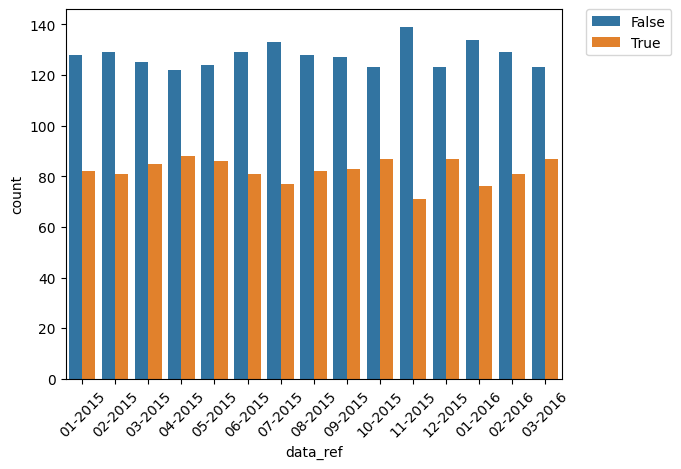

In [53]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=previsao_renda2)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

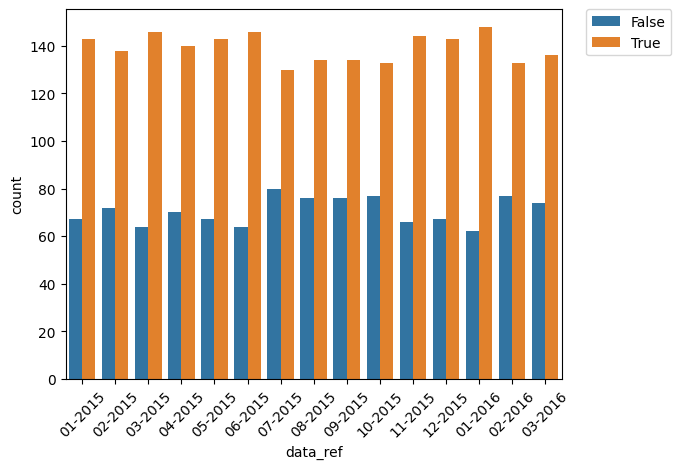

In [54]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=previsao_renda2)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Houve uma alteração interessante. Na comparação das variáveis qualitativas como preditoras de renda, possuir veículo apresentou-se bem significativo, olhando a amostragem de dados à luz da distribuição no tempo, a posse de imóvel tornou-se mais significativa.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

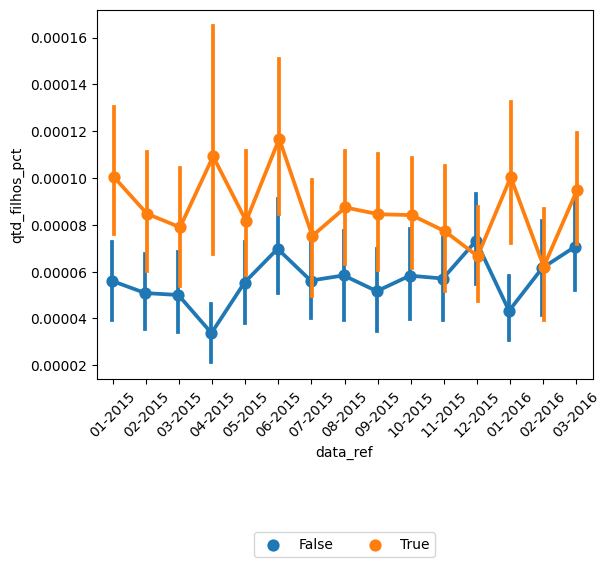

In [55]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

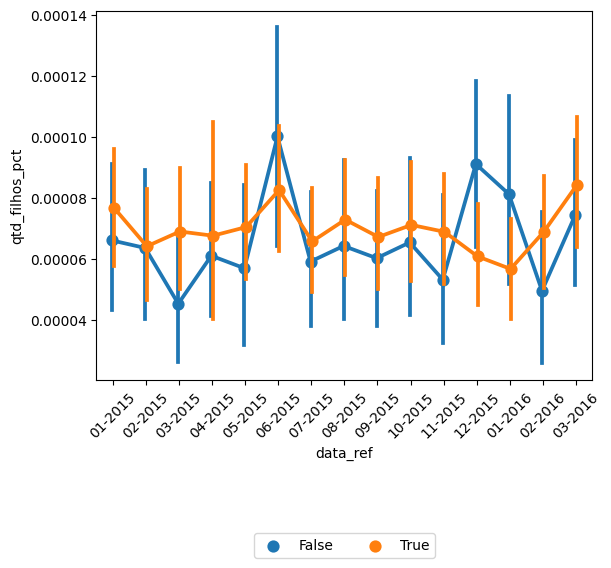

In [56]:
ax = sns.pointplot(x="data_ref", y="qtd_filhos_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

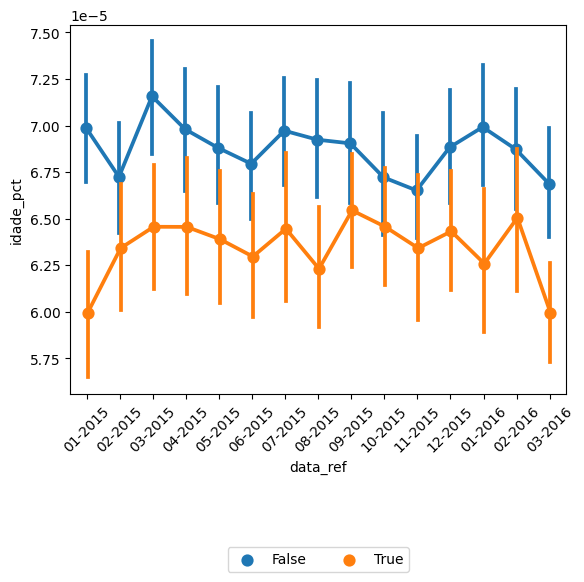

In [57]:
ax = sns.pointplot(x="data_ref", y="idade_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

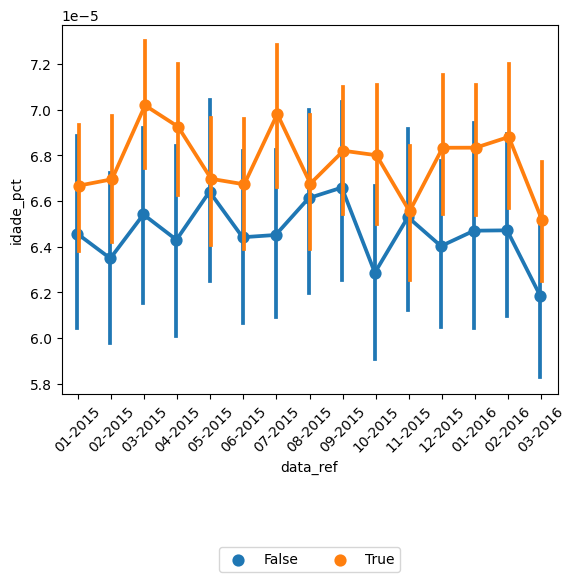

In [58]:
ax = sns.pointplot(x="data_ref", y="idade_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

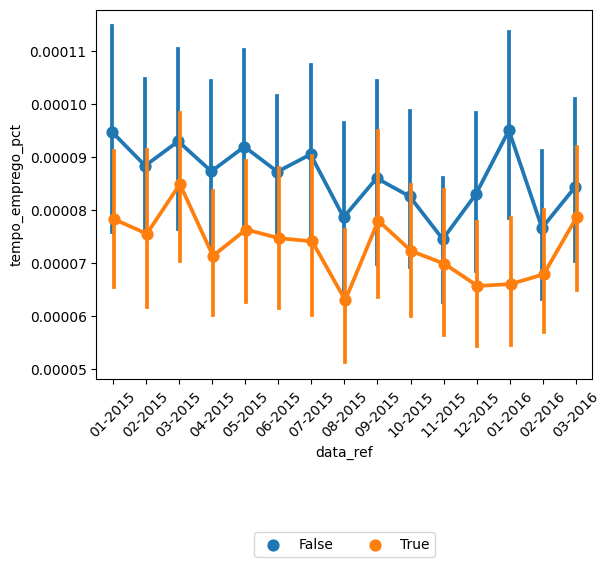

In [59]:
ax = sns.pointplot(x="data_ref", y="tempo_emprego_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

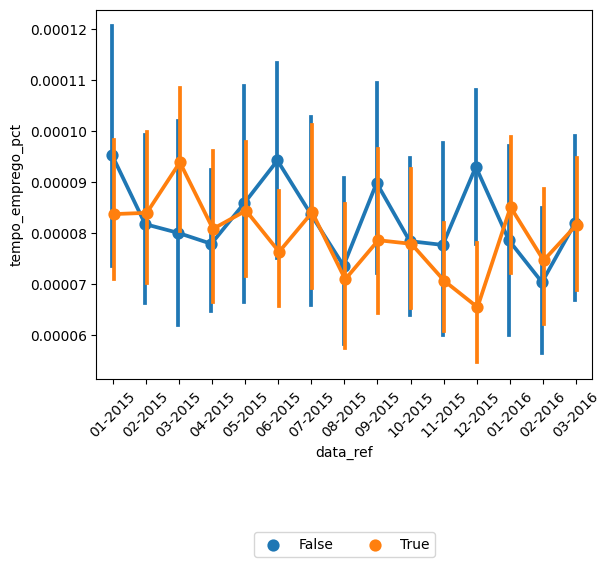

In [60]:
ax = sns.pointplot(x="data_ref", y="tempo_emprego_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

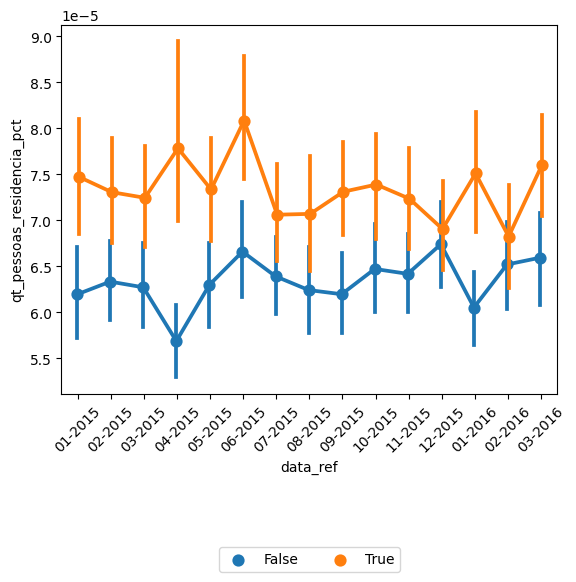

In [61]:
ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

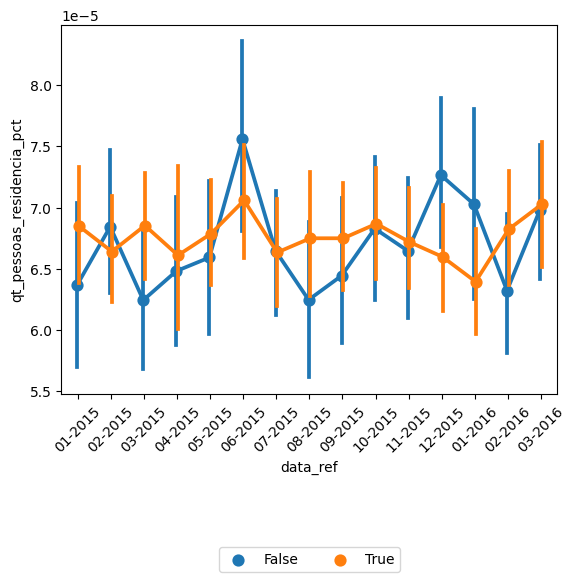

In [62]:
ax = sns.pointplot(x="data_ref", y="qt_pessoas_residencia_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

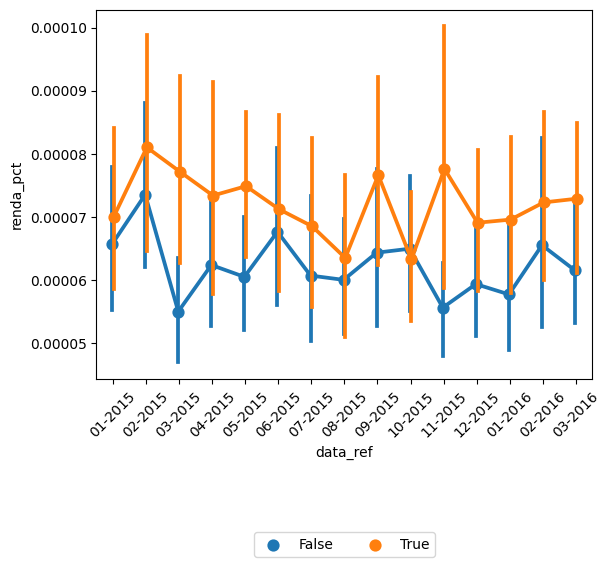

In [63]:
ax = sns.pointplot(x="data_ref", y="renda_pct", hue = 'posse_de_veiculo',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

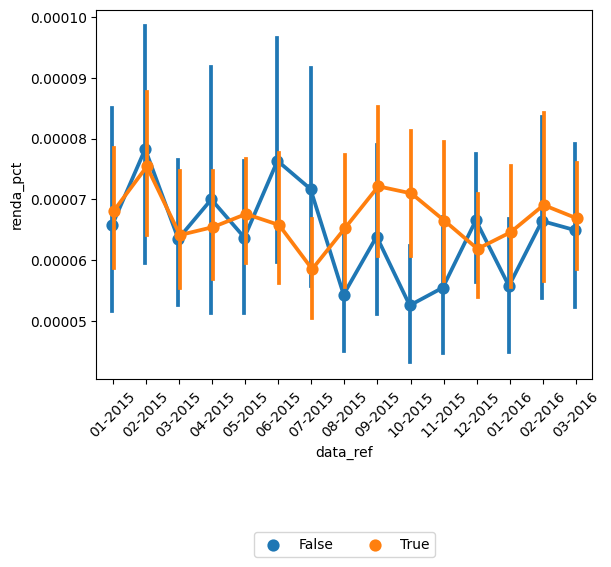

In [64]:
ax = sns.pointplot(x="data_ref", y="renda_pct", hue = 'posse_de_imovel',
                   data=previsao_renda2, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao_renda2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao_renda2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

Existe uma oscilação preocupante nas variavéis quantitativas que pode comprometer a integridade da modelagem.